In [18]:
import cdsapi
import matplotlib.pyplot as plt
import cartopy.crs as crs
from pathlib import Path
import xarray as xr

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6

In [3]:
if os.getcwd().split('/')[2] == 'tommylees':
    data_dir = Path("/Volumes/Lees_Extend/data/ecmwf_sowc/")
else:
    data_dir = Path('./data')
print(data_dir)

c = cdsapi.Client()

In [4]:
from functools import partial

def download_data(cdsapi_client, save_data_path, level_types, data_dict):
    datapath = Path(save_data_path)
    if not datapath.exists():
        cdsapi_client.retrieve(level_types, data_dict, save_data_path)
    else:
        print('Dataset already downloaded!')
        
    return datapath


# How to work with partial functions?
def download_pressure(cdsapi_client):
    save_data_path = (data_dir/"pressure.grib").as_posix()
    level_types = "reanalysis-era5-pressure-levels"
    data_dict = {
           "variable": "temperature",
           "pressure_level": "1000",
           "product_type": "reanalysis",
           "date": "2017-12-01/2017-12-31",
           "time": "12:00",
           "format": "grib"
    }
    
    return download_data(cdsapi_client, save_data_path, level_types, data_dict)
    
    
def download_orography(cdsapi_client):
    save_data_path = (data_dir/"orography.grib").as_posix()
    level_types = "reanalysis-era5-single-levels"
    data_dict = {
        'product_type': 'reanalysis',
        'variable':     'orography',
        'year':         '2016',
        'month':        '01',
        'day':          '01',
        'time':         '00:00'
    }
    
    return download_data(cdsapi_client, save_data_path, level_types, data_dict)

In [15]:
orog_path = download_orography(c)
pressure_path = download_pressure(c)

Dataset already downloaded!
Dataset already downloaded!


# Plot the Datasets

In [13]:
# Orography
ds = xr.open_dataset(orog_path, engine='cfgrib')

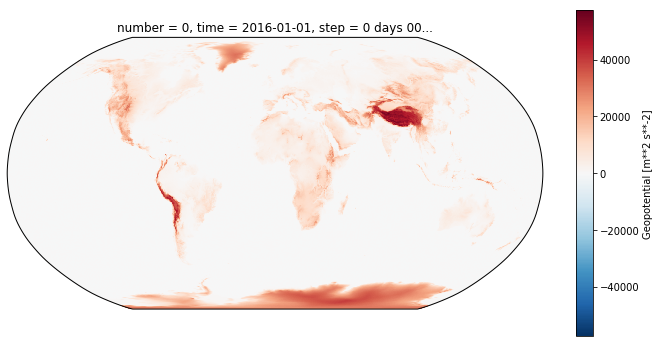

In [19]:
ax = plt.axes(projection=crs.Robinson(central_longitude=0))
ds.z.plot(transform=crs.PlateCarree())

# Plot the Pressure over time
[Pangeo CMIP6 Examples with Binder](https://github.com/pangeo-data/pangeo_cmip6_examples)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
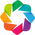

In [20]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import cartopy.crs as crs
from holoviews.operation.datashader import regrid
hv.extension('bokeh', 'matplotlib')

In [21]:
ds = xr.open_dataset(pressure_path, engine='cfgrib')

In [22]:
def quick_plot(da, dims, redim_range=None, **user_options):
    """"""
    options = dict(cmap='viridis', colorbar=True,
                   width=700, height=450)
    options.update(user_options)
    name = da.name
    dataset = hv.Dataset(da)
    image = (dataset.to(hv.QuadMesh, dims, dynamic=True)
                       .options(**options))
    if redim_range is not None:
        image = image.redim.range(**{name: redim_range})

    return hv.output(image, backend='bokeh')


def quick_map(da, dims=['lon', 'lat'], redim_range=None, **user_options):
    """"""
    options = dict(cmap='viridis', colorbar=True,
                   fig_size=300,
                   projection=crs.Robinson(central_longitude=180))
    options.update(user_options)
    name = da.name
    dataset = gv.Dataset(da)
    image = (dataset.to(gv.Image, dims, dynamic=True)
                       .options(**options))
    if redim_range is not None:
        image = image.redim.range(**{name: redim_range})

    return gv.output(image * gf.coastline(), backend='matplotlib')

In [31]:
if 'longitude' in [var for var in ds.variables]:
    ds = ds.rename({'longitude':'lon','latitude':'lat'})
quick_map(ds.t)

:DynamicMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (t)
      .Coastline.I :Feature   [Longitude,Latitude]

In [33]:
ds.t

<xarray.DataArray 't' (time: 31, lat: 721, lon: 1440)>
[32185440 values with dtype=float32]
Coordinates:
    number         int64 ...
  * time           (time) datetime64[ns] 2017-12-01T12:00:00 ... 2017-12-31T12:00:00
    step           timedelta64[ns] ...
    isobaricInhPa  int64 ...
  * lat            (lat) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon            (lon) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    valid_time     (time) datetime64[ns] ...
Attributes:
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    GRIB_name:                                Temperature
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1038240
    GRIB_totalNumber:          